In [65]:
import matplotlib.pyplot as plt
import clmm
from clmm.polaraveraging import compute_shear, compute_deltasigma, make_shear_profile, make_bins
from clmm.plotting import plot_profiles
from clmm.galaxycluster import GalaxyCluster
import clmm.utils as u
import sys
sys.path.append('./support')
import mock_data as mock

In [66]:
from astropy.cosmology import FlatLambdaCDM
mock_cosmo = FlatLambdaCDM(H0=70., Om0=0.3, Ob0=0.025)

In [67]:
cosmo = mock_cosmo
cluster_id = "Awesome_cluster"
cluster_m = 1.e15
cluster_z = 0.3
concentration = 4
ngals = 10000
Delta = 200

zsrc_min = cluster_z + 0.1 # we only want to draw background galaxies

noisy_data_z = mock.generate_galaxy_catalog(cluster_m,
                                            cluster_z,
                                            concentration,
                                            cosmo,
                                            ngals,
                                            Delta,
                                            'chang13',
                                            zsrc_min = zsrc_min,
                                            shapenoise=0.05,
                                            photoz_sigma_unscaled=0.05)

In [68]:
cluster_ra = 0.0
cluster_dec = 0.0
cl = GalaxyCluster(cluster_id, cluster_ra, cluster_dec, 
                               cluster_z, noisy_data_z)

In [69]:
cl.compute_deltasigma(cosmo=mock_cosmo,add_to_cluster=True);
# Now there are 3 new columns: DeltaSigmat, DeltaSigmax, Sigmac
# Units of DeltaSigma and Sigma_crit are h M_sun/pc2
cl.galcat.keys()

['ra',
 'dec',
 'e1',
 'e2',
 'z',
 'pzbins',
 'pzpdf',
 'id',
 'theta',
 'gt',
 'gx',
 'DeltaSigmat',
 'DeltaSigmax',
 'Sigmac']

In [70]:
bins = make_bins(0.2, 4, nbins=10, method='evenlog10width')
cl.make_deltasigma_profile("radians", "Mpc", bins=bins, cosmo=mock_cosmo);

# the deltasigma binned profile is stored in a table called DSprofile
cl.DSprofile

radius_min,radius,radius_max,DeltaSigmat,DeltaSigmat_err,DeltaSigmax,DeltaSigmax_err,z,z_err,n_src
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
0.20000000000000004,0.2374249615670447,0.2698565695347127,520.8051868268678,89.28357366689545,-50.739110184579005,25.441202790330056,1.171027226030278,0.16230967874145816,4
0.2698565695347127,0.310076702111927,0.3641128406052161,537.5985563007254,34.39866208938274,-23.947960743403094,64.86069358090457,1.7166368013995337,0.2282701174752844,13
0.3641128406052161,0.43298369800842434,0.4912912104463162,387.49326512520804,41.199033069430904,-21.16559770198597,45.61943113094648,1.538487761108502,0.13525799635550922,23
0.4912912104463162,0.5652324608591356,0.6628908034679974,287.7818551784952,28.35061707880647,2.8311923966465113,29.543658022376167,1.3139705014770682,0.09748488223907147,45
0.6628908034679974,0.7847899661578838,0.8944271909999161,257.99551110588806,19.672001350961594,48.68442613807696,20.84029892756253,1.2785541115098145,0.07596201096953552,91
0.8944271909999161,1.0551033948149198,1.2068352673090326,184.32373731851655,15.451084702290212,15.17647514829972,16.70514220229905,1.2178194256080164,0.059726264097044596,177
1.2068352673090326,1.4296456774888664,1.6283621261476176,139.68660078659914,12.854759425978157,8.806173201740114,13.490579592369594,1.311913588169992,0.043857598518001056,268
1.6283621261476176,1.921184763634533,2.1971210866122357,88.47356098856783,10.148071863707772,-8.78051647206458,10.757205111445389,1.2461338633446553,0.03074538223910361,497
2.1971210866122357,2.589844724293986,2.964537796427791,77.32668721745755,7.775331801588771,-8.276873107551122,7.475061202819783,1.282163907039736,0.02321627429805366,940


Text(0, 0.5, '$\\Delta\\Sigma$ $[h\\ M_\\odot\\ pc^{-2}]$ ')

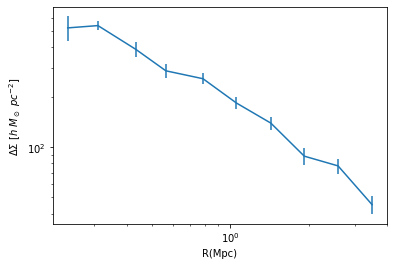

In [71]:
plt.errorbar(cl.DSprofile['radius'], cl.DSprofile['DeltaSigmat'],cl.DSprofile['DeltaSigmat_err'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R(Mpc)')
plt.ylabel(r'$\Delta\Sigma$ $[h\ M_\odot\ pc^{-2}]$ ')